In [1]:
import cv2
import numpy as np
from numpy.linalg import svd
import time
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
def SVD_compress_single_channle(channel, compression_level):
    # Perform SVD analysis
    U,S,V = svd(channel)

    # Reduce number of singular values
    k = int((1-compression_level)*S.shape[0])
    U_compress = U[:,:k]
    S_compress = S[:k]
    V_compress = V[:k,:]

    compressed_channel = U_compress @ np.diag(S_compress) @ V_compress

    # Normalize the color channel back to range 0-255
    compressed_channel = np.clip(compressed_channel, 0, 255)
    return compressed_channel

def SVD_compress_image(img, compression_level = 0.99):
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]

    start = time.time()
    red_channel_compressed = SVD_compress_single_channle(red_channel, compression_level)
    green_channel_compressed = SVD_compress_single_channle(green_channel, compression_level)
    blue_channel_compressed = SVD_compress_single_channle(blue_channel, compression_level)
    print(f'Finished performing SVD analysis in {(time.time() - start):.2f}s')

    compressed_image = np.dstack((red_channel_compressed, green_channel_compressed, blue_channel_compressed))


    return compressed_image.astype(np.uint8)

In [43]:
# Load image
img = cv2.imread('gym.jpg')

compress_image = SVD_compress_image(img, 0.992)

Finished perform SVD analysis in 25.52s


In [45]:
cv2.imwrite('compressed_image.jpg', compress_image)

True

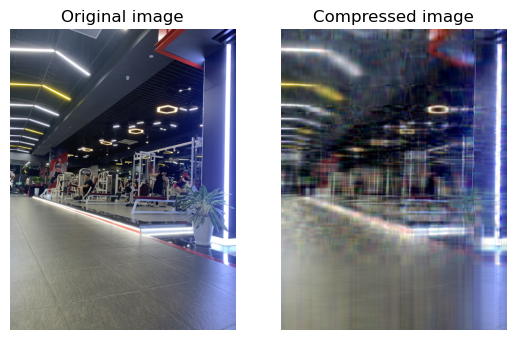

In [44]:
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGRA))
ax[0].set_title('Original image')
ax[1].axis('off')
ax[1].imshow(cv2.cvtColor(compress_image, cv2.COLOR_RGB2BGRA))
ax[1].set_title('Compressed image')
fig.show()